# 4.10 Task Part 1 : Enriching data project using the merged customer data

## Table of contents :

### 1.Importing the dataset from 4.9, along with the libraries
### 2.Considering any security implications
### 3. Comparing customer behavior in different geographic areas
### 4. Excluding low-activity customers (customers with less than 5 orders)
### 5. Customer profiling using different variables
### 6. Creating an appropriate visualization to show the distribution of profiles
### 7. Aggregating variables on a customer-profile level
### 8. Comparing customer profiles with regions and departments
### 9. Producing suitable charts to illustrate the results
### 10. Exporting the final dataframe used for the visuals

## 1.Import the data set you exported in Exercise 4.9 into a new Jupyter notebook

In [1]:
# Importing all libraries used in this task, inckuding data viz libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# creating a path to the prepared data folder

path = r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\02 Data\Prepared Data'

# importing the latest merged data frame

df = pd.read_pickle(os.path.join(path, 'ords_prods_cust_merged.pkl'))

#calling the df to verify its head, tail and shape

df

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,last_name,gender,state,age,date_joined,n_dependants,fam_status,income,years_since_join,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,5,both
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,5,both
2,2539329,1,1,2,8,NaN,12427,3,0,Original Beef Jerky,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,5,both
3,2539329,1,1,2,8,NaN,26088,4,0,Aged White Cheddar Popcorn,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,5,both
4,2539329,1,1,2,8,NaN,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Nguyen,Female,Alabama,31,2019-02-17,3,married,40423,5,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,2977660,206209,13,1,12,7.0,14197,5,1,Tomato Paste,...,Donovan,Female,Iowa,74,2019-09-14,3,married,137969,5,both
32404855,2977660,206209,13,1,12,7.0,38730,6,0,Brownie Crunch High Protein Bar,...,Donovan,Female,Iowa,74,2019-09-14,3,married,137969,5,both
32404856,2977660,206209,13,1,12,7.0,31477,7,0,High Protein Bar Chunky Peanut Butter,...,Donovan,Female,Iowa,74,2019-09-14,3,married,137969,5,both
32404857,2977660,206209,13,1,12,7.0,6567,8,0,Chocolate Peanut Butter Protein Bar,...,Donovan,Female,Iowa,74,2019-09-14,3,married,137969,5,both


## 2.Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [2]:
# checking all columns names

df.columns

Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge_prods', 'price_range_loc',
       'Busiest day', 'Busiest_days_new', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price_by_user', 'spending_flag',
       'median_frequency', 'frequency_flag', 'first_name', 'last_name',
       'gender', 'state', 'age', 'date_joined', 'n_dependants', 'fam_status',
       'income', 'years_since_join', '_merge'],
      dtype='object')

In [3]:
# There are PII data stored in the columns 'first_name' and 'last_name'

# Since there already is a user_id allowing the distinction from a customer to another, there name isn't relevant to the study : I suggest deleting both columns

# deleting the PII columns
df = df.drop(['first_name', 'last_name'], axis=1 )

# checking all columns names to make sure the delete was done

df.columns



Index(['order_id', 'user_id', 'order_number', 'order_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge_prods', 'price_range_loc',
       'Busiest day', 'Busiest_days_new', 'busiest_period_of_day', 'max_order',
       'loyalty_flag', 'avg_price_by_user', 'spending_flag',
       'median_frequency', 'frequency_flag', 'gender', 'state', 'age',
       'date_joined', 'n_dependants', 'fam_status', 'income',
       'years_since_join', '_merge'],
      dtype='object')

## 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

### Use the region information in this Wikipedia article to create your column (you only need to create regions, not divisions)

In [7]:
# importing the list of regions from wikipedia (arranged in Excel)

path_2 = r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\02 Data\Original Data'
df_regions = pd.read_csv(os.path.join(path,'Regions_wiki.csv' ), index_col =False, delimiter =';')

df_regions.head()

,state,Region
0,Maine,Region 1 (Northeast)
1,New Hampshire,Region 1 (Northeast)
2,Vermont,Region 1 (Northeast)
3,Massachusetts,Region 1 (Northeast)
4,Rhode Island,Region 1 (Northeast)


In [9]:
# merging the regions from df_regions to the states from df

df_merged = pd.merge(df,df_regions, left_on = 'state', right_on = 'state', how ='left', indicator = False)

In [6]:
# counting values from the new 'Region' column from df_merged to check for any NaN value

df_merged['Region'].value_counts()

Region
Region 3 (South)        10791885
Region 4 (West)          8292913
Region 2 (Midwest)       7597325
Region 1 (Northeast)     5722736
Name: count, dtype: int64

### Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [11]:
# creating a pivot table from the spending flag by region

pivot_spend_region = pd.pivot_table(df_merged,index = ['spending_flag'],columns =['Region'], values = 'user_id', aggfunc ='nunique')

pivot_spend_region.to_clipboard()

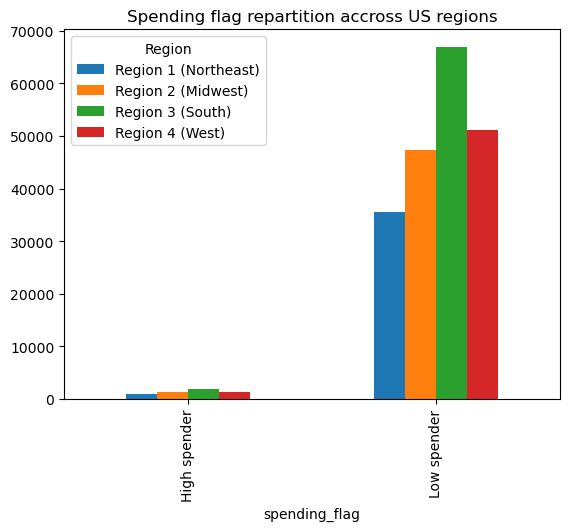

In [8]:
# creating a quick visual in order to compare from a region to another

bar_region = pivot_spend_region.plot(kind='bar', stacked= False, title='Spending flag repartition accross US regions')

fig = bar_region.get_figure()

#Saving the figure to the visualizations folder
fig.savefig(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Spending_flag_repartition.png', dpi=300, bbox_inches='tight')

It seems that spending habits are quite similar from a region to another :  regions with more customers have more low and high spenders.

In this visual, and without a calculated ratio, we could say that customers in the South tend to spend a bit less.

## 4.The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [13]:
# Creating the exclusion flag for low activity customers having less than 5 orders

def low_activity(row):
    
    if row['max_order'] < 5:
        return 'excluded_low_activity'
    else : return 'kept_high_activity'

# Creating the new column with the activity flag    
df_merged['activity_flag'] = df_merged.apply(low_activity, axis=1)

# counting the number of each activity flag
df_merged['activity_flag'].value_counts(dropna = False)

activity_flag
kept_high_activity       30964564
excluded_low_activity     1440295
Name: count, dtype: int64

In [15]:
#creating a subset with only the orders from high activity customers

df_merged_high_activity = df_merged.loc[df_merged['activity_flag'] == 'kept_high_activity']

#counting all remaining max order to check if there are any less than 5
df_merged_high_activity['max_order'].value_counts(dropna=False).sort_index()

max_order
5      793140
6      811396
7      803979
8      811843
9      810213
       ...   
95      59877
96      40453
97      44949
98      44587
99    1171333
Name: count, Length: 95, dtype: int64

In [11]:
# exporting the subset of all the high activity customers

df_merged_high_activity.to_pickle(os.path.join(path, 'ords_prods_high_activity_customers.pkl'))

## 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [12]:
# Defining the customer profiles to sort :

## 1. single adult :  under 21 y/o and a family status != married
## 2. young parent : under 40 y/o, at least one pendent, and one order in the babies department id (18)
## 3. student : under 25 y/o, family status != married and divorced/widowed, no pendents and an income < 30k
## 4. Retired : above 60 y/o, orders in week days (2,3,4,5,6), orders in working hours (from 9 to 17)
## 5. Family : above 21 y/o, family status = married, at least one pendent and some orders of household goods (department_id = 17)


In [21]:
# 1. single adult :  under 21 y/o and a family status != married

df_merged_high_activity.loc[(df_merged_high_activity['age'] < 21) &
                            (df_merged_high_activity['fam_status'] != 'married'), 'cust_profile'] = 'Single adult'

In [23]:
# 2. young parent : under 40 y/o, at least one pendent, and one order in the babies department id (18)
    
df_merged_high_activity.loc[(df_merged_high_activity['age'] < 40) &
                            (df_merged_high_activity['n_dependants'] != 0) &
                            (df_merged_high_activity['department_id'] == 18), 'cust_profile'] = 'Young parent'

In [25]:
# 3. student : under 25 y/o, family status != married and divorced/widowed, no pendents and an income < 

df_merged_high_activity.loc[(df_merged_high_activity['age'] < 25) &
                            (df_merged_high_activity['fam_status'] != 'married') &
                            (df_merged_high_activity['fam_status'] != 'divorde/widowed') & 
                            (df_merged_high_activity['n_dependants'] == 0) &
                            (df_merged_high_activity['income'] < 30000), 'cust_profile'] = 'Student'

In [27]:
# 4. Retired : above 60 y/o, orders in week days (2,3,4,5,6), orders in working hours (from 9 to 17)

df_merged_high_activity = df_merged_high_activity.astype({'order_hour_of_day':'float64'})

df_merged_high_activity.loc[(df_merged_high_activity['age'] > 60) &
                            (df_merged_high_activity['order_day_of_week'] != 1 ) &
                            (df_merged_high_activity['order_day_of_week'] != 7) & 
                            (df_merged_high_activity['order_hour_of_day'] >= 9) &
                            (df_merged_high_activity['order_hour_of_day'] <= 17), 'cust_profile'] = 'Retired'

In [29]:
# 5. Family : above 21 y/o, family status = married, at least one pendent and some orders of household goods (department_id = 17)

df_merged_high_activity.loc[(df_merged_high_activity['fam_status'] != 'married') & 
                            (df_merged_high_activity['n_dependants'] > 0) &
                            (df_merged_high_activity['department_id'] == 17), 'cust_profile'] = 'Family'


In [31]:
# checking counts of the new cust_profile variable

df_merged_high_activity['cust_profile'].value_counts(dropna=False)



cust_profile
NaN             23456882
Retired          5946545
Single adult     1408864
Young parent      105132
Family             33349
Student            13792
Name: count, dtype: int64

Many rows are left without a customer profile, leaving some more room for more profiles, to be defined with the stakeholders (marketing team, sales representatives).

## 6. Create an appropriate visualization to show the distribution of profiles.

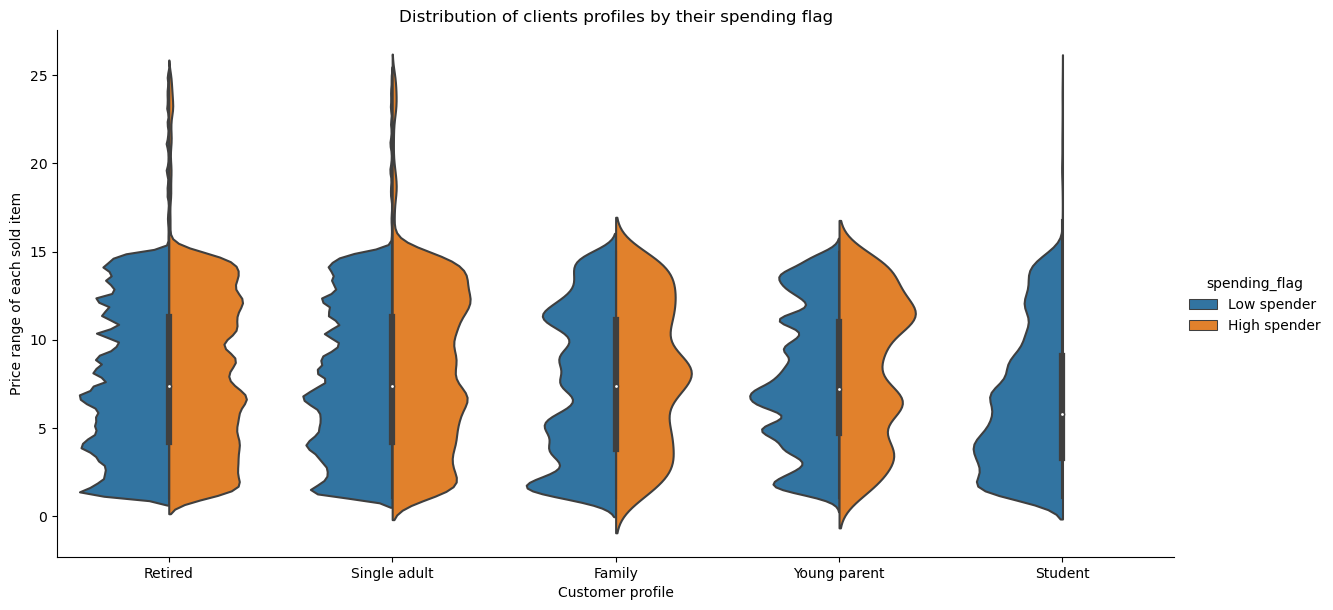

In [33]:
# creating a violin catplot to show the distribution of the profiles, taking into consideration the prices of items ordered and the spending_flag
violin_dist_cust_profiles = sns.catplot(data=df_merged_high_activity, 
                                        x='cust_profile', 
                                        y='prices', 
                                        hue='spending_flag', 
                                        kind ='violin', 
                                        split = True, 
                                        height=6, aspect=2)
plt.title('Distribution of clients profiles by their spending flag')
plt.xlabel('Customer profile')
plt.ylabel('Price range of each sold item')

#Saving the figure to the visualizations folder
violin_dist_cust_profiles.figure.savefig(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Violin_distribution_profiles.png', dpi=300)

-Most clients buy articles from 1 to 15 dollars : Top buyers are mostly retired clients and single adults, eventhough the average prices are higher in the group of families.

-Students have no high spender, and most of them buy articles below 5 dollars.


## 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [46]:
# creating a table with the mean, min and max of the main float/int variables on a customer profile level

df_merged_high_activity.groupby('cust_profile').agg({'avg_price_by_user': ['mean', 'min', 'max'],
                                                     'max_order': ['mean', 'min', 'max'],
                                                     'age': ['mean', 'min', 'max'],
                                                     'n_dependants': ['mean', 'min', 'max'],
                                                     'income': ['mean', 'min', 'max'],
                                                     'years_since_join': ['mean', 'min', 'max']})

avg_price_by_user                          max_order          \
                          mean       min           max       mean min max   
cust_profile                                                                
Family               14.679968  2.133333  10209.987755  31.466041   5  99   
Retired              11.953864  1.262500  14042.512281  34.164441   5  99   
Single adult         10.473342  2.133333   5668.766038  34.268252   5  99   
Student               6.532744  4.192857      6.993458  33.429814   5  85   
Young parent          9.705867  3.753846   3683.847794  39.677320   5  99   

                    age         n_dependants                 income         \
                   mean min max         mean min max           mean    min   
cust_profile                                                                 
Family        19.478725  18  21     2.000390   1   3   72385.581127  26095   
Retired       71.052966  61  81     1.501037   0   3  116095.627771  29001   
Single adult  19.001095  18  20     1.510932   0   3   70607.459361  25972   
Student       20.740864  18  24     0.000000   0   0   28352.579539  26067   
Young parent  28.588451  18  39     1.995025   1   3   71794.084684  26293   

                     years_since_join          
                 max             mean min max  
cust_profile                                   
Family        396364         5.880866   4   7  
Retired       593901         5.843430   4   7  
Single adult  396364         5.859872   4   7  
Student        29997         5.724913   4   7  
Young parent  392552         5.835093   4   7

## 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

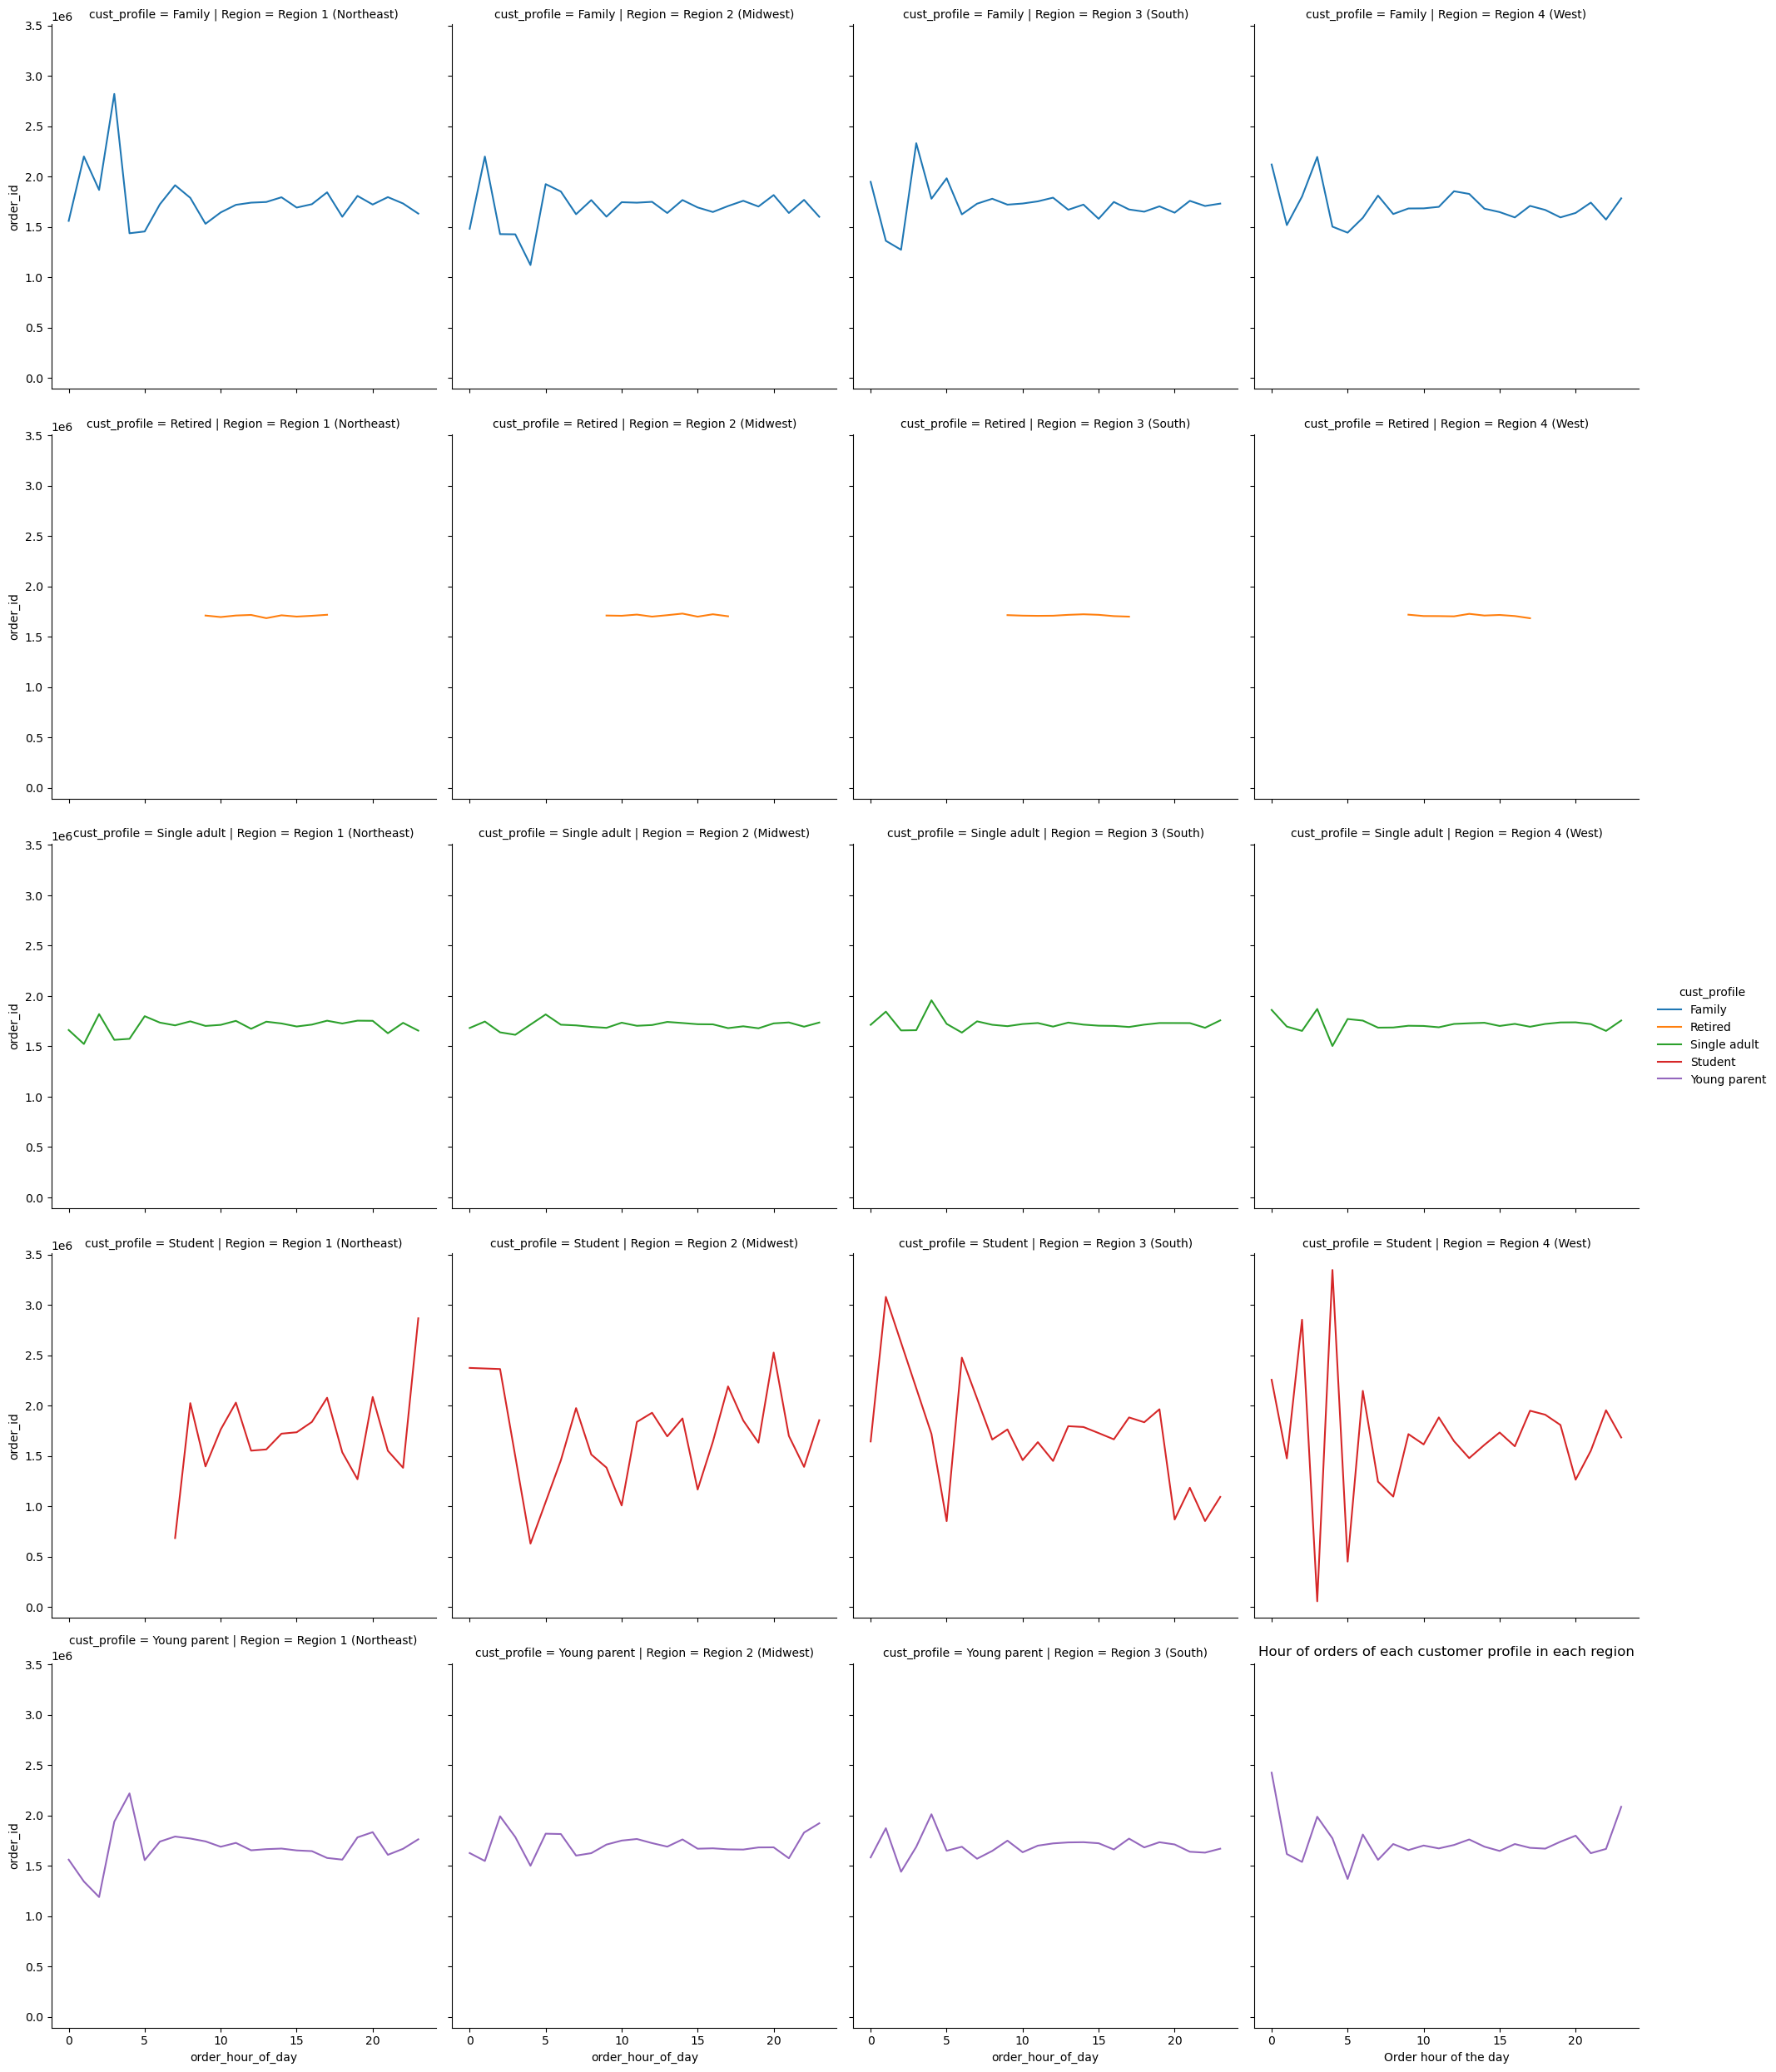

In [35]:
# creating a scatterplot of all profiles by region and order hour the day habits

pivot_hour_profile = pd.pivot_table(df_merged_high_activity,index = ['Region','cust_profile', 'order_hour_of_day'], values = 'order_id', aggfunc ='mean').reset_index()

fig_line_hour = sns.relplot(data=pivot_hour_profile, 
                            y='order_id', 
                            x='order_hour_of_day', 
                            hue='cust_profile', 
                            col='Region', 
                            row='cust_profile', 
                            kind='line', 
                            errorbar=None)
plt.title('Hour of orders of each customer profile in each region')
plt.xlabel('Order hour of the day')
plt.ylabel('Average number of orders')

#Saving the figure to the visualizations folder
fig_line_hour.figure.savefig(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Lineplot average orders by hours for each customer profile by region.png', dpi=300,bbox_inches='tight')


The lineplot above shows different habits of orders hour for the customer profiles :

-For the retired clients, the hour was a selctive criteria, namely there is no order placed outside of working hours.

-Students are clearly the least consistent group of clients, with orders placed at every hour of the dday and even at night, making them somehow more compulsive buyers.

-Families and young adults tend to behave in a similat fashion, quite consistent during the day, with a bit more order in the early mornings

-Young parents look like they are still adjusting their schedules, with more orders placed on early morning and late at night

-People overall tend to order the latest in the West region, that said all regions tend to look similar.

In [36]:
# creating a pivot table with average prices accross the regions by each customer profile, future base for the next cell holding a barplot

pivot_region_price_profile = pd.pivot_table(df_merged_high_activity,index = ['Region'],columns =['cust_profile'], values = 'prices', aggfunc ='mean')

pivot_region_price_profile

cust_profile,Family,Retired,Single adult,Student,Young parent
Region,,,,,
Region 1 (Northeast),7.607830,7.804328,7.777686,6.539682,7.668910
Region 2 (Midwest),7.317727,7.793191,7.813368,6.544036,7.630599
Region 3 (South),7.229757,7.800911,7.828157,6.622101,7.730076
Region 4 (West),7.458949,7.800699,7.792825,6.428701,7.647045


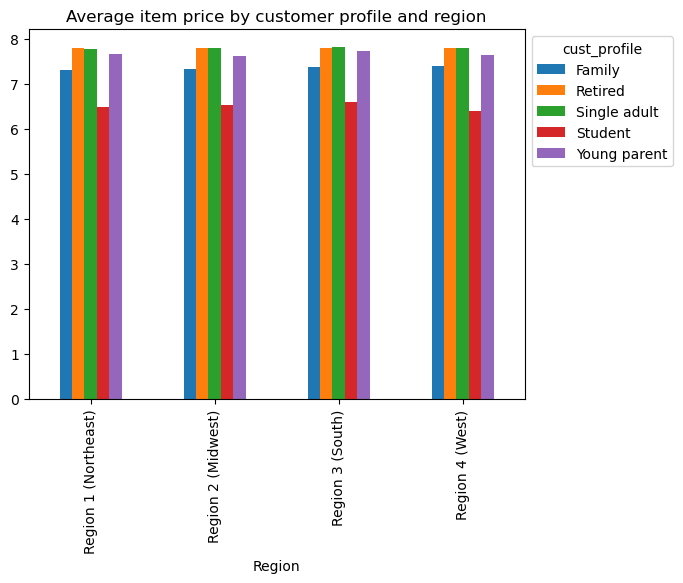

In [23]:
#Creating a barplot showing the average price spent by item, by cusotmer profile accross regions

fig_avg_price = pivot_region_price_profile.plot(kind='bar', 
                                                stacked= False, 
                                                title ='Average item price by customer profile and region')
sns.move_legend(fig_avg_price, "upper left", bbox_to_anchor=(1, 1))

#Saving the figure to the visualizations folder
fig_avg_price.figure.savefig(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Barplot average price by region and customer profile.png', dpi=300,bbox_inches='tight')

The main idea of this barplot is that there are a lot of similarities from a region to another

## 9. Produce suitable charts to illustrate your results and export them in your project folder.

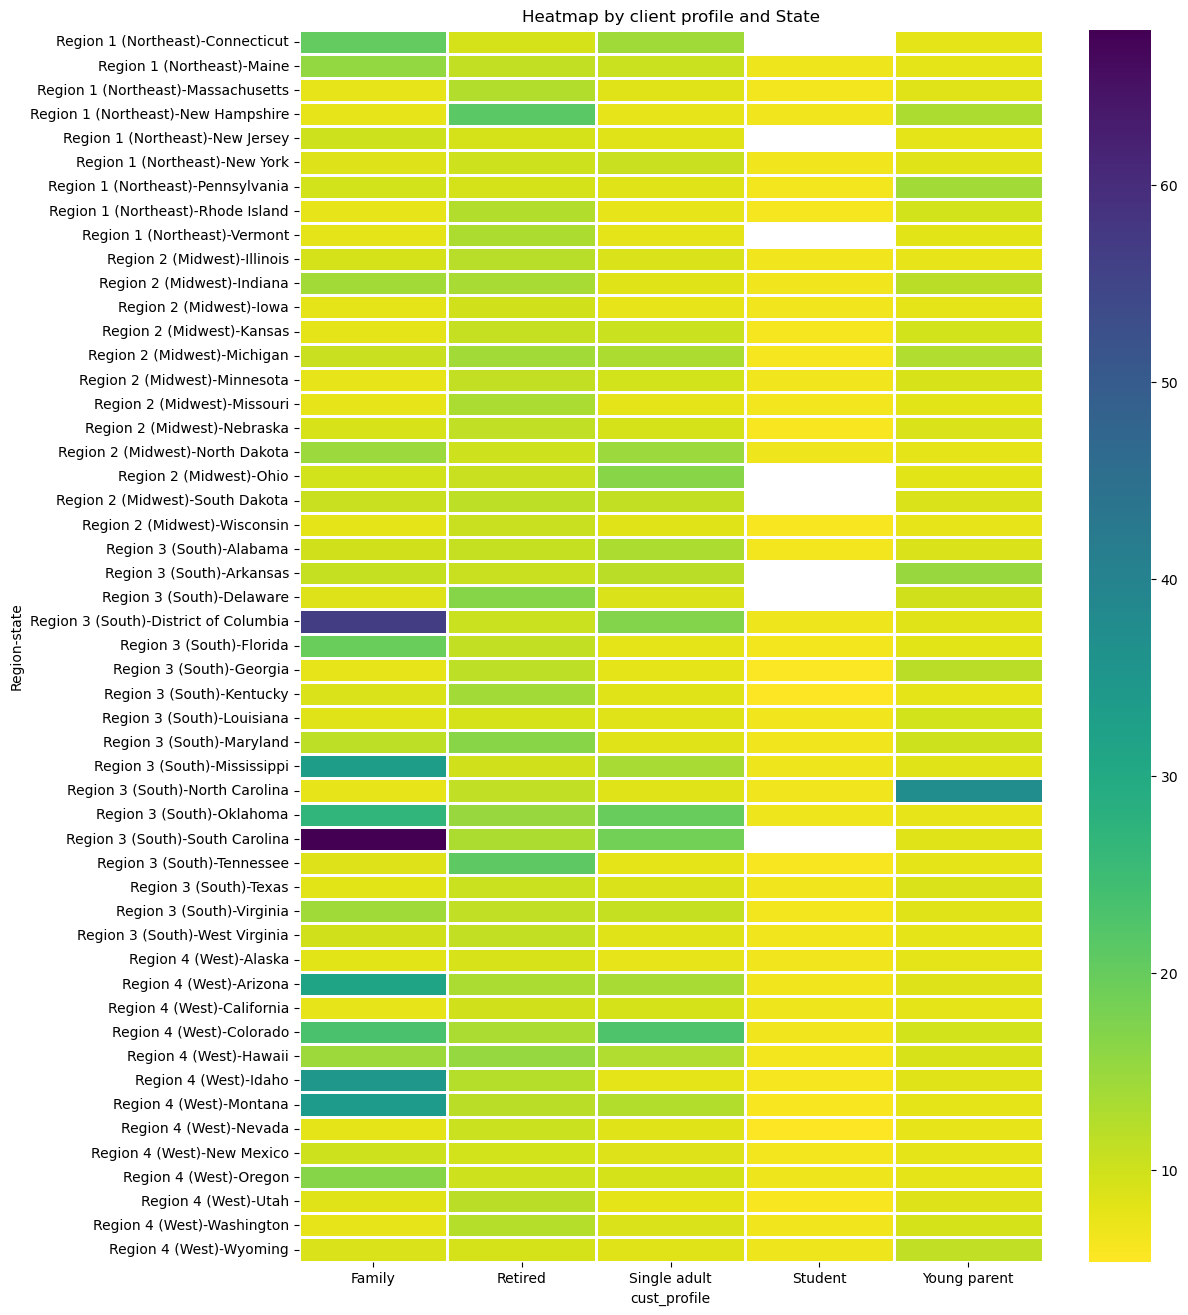

In [37]:
#Creating a heatmap showing the average price by user for each customer profile and for each state of USA

pivot_heatmap = pd.pivot_table(df_merged_high_activity,
                               index = ['Region','state'],
                               columns =['cust_profile'], 
                               values = 'avg_price_by_user', 
                               aggfunc ='mean')

plt.figure(figsize=(12, 16))
plt.title('Heatmap by client profile and State')
Heatmap_profile = sns.heatmap(pivot_heatmap, 
                              linewidth=.8, 
                              cmap='viridis_r')

#Saving the figure to the visualizations folder
Heatmap_profile.figure.savefig(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Heatmap_profile_avg_price.png', dpi=300,bbox_inches='tight')


Families tend to buy more expensive products, followed by retired people.
Students are buying the cheapest items accros the US
Some States stand out, a choroopleth map would make it a lot clearer to the eye :

In [38]:
#Importing the library plotly in order to create maps

import plotly.express as px

In [48]:
#Importing a csv file containing the iso information needed by plotly
df_iso_states = pd.read_csv(os.path.join(path,'iso_states_usa.csv' ), index_col =False, delimiter =';')

df_iso_states.head()

,ISO,State
0,AL,Alabama
1,AK,Alaska
2,AS,American Samoa
3,AZ,Arizona
4,AR,Arkansas


In [50]:
#merging the latest dataframe with the imported ISO codes for the US states

df_merged_high_activity_iso = pd.merge(df_merged_high_activity,
                                       df_iso_states, 
                                       left_on = 'state', 
                                       right_on = 'State', 
                                       how ='left', 
                                       indicator = False)

In [51]:
#Creating a pivot table grouping the means of each avg_price_by_user for each iso code and custumer profile, base for creating the following choropleth map

full_map_pivot = df_merged_high_activity_iso.pivot_table(index = ['ISO','state','cust_profile'], 
                                                         values = 'avg_price_by_user', 
                                                         aggfunc ='mean')
full_map_pivot = full_map_pivot.reset_index()
full_map_pivot.head()

,ISO,state,cust_profile,avg_price_by_user
0,AK,Alaska,Family,8.230469
1,AK,Alaska,Retired,9.092548
2,AK,Alaska,Single adult,7.697360
3,AK,Alaska,Student,6.651111
4,AK,Alaska,Young parent,7.881711


In [52]:
#Creating a choropleth map from the above pivot table, showing in a animated way the spending habits by state for each customer profile

Fig_profile_map = px.choropleth(full_map_pivot, 
                                color='avg_price_by_user',
                                locations='ISO',
                                locationmode="USA-states", 
                                projection='albers usa', 
                                color_continuous_scale="Viridis_r",
                                animation_frame='cust_profile', 
                                range_color=(5,35), 
                                hover_name ='state', 
                                labels={'avg_price_by_user':'Average price spent', 'cust_profile':'Customer profile' }, 
                                title ='Repartition of the average price spent by customer according to their profile', 
                                width=1500, 
                                height=750)

#Saving the figure to the visualizations folder
Fig_profile_map.write_html(r'C:\Users\dacol\Documents\Data Project - careerfoundry\Instacart basket analysis\04 Analysis\Visualizations\Map_client_profile_avg_price.html')


The map shows the buying habits of each customer profile accros USA : some states stand out for some profiles (ex : Louisiana for the families or North Caroline for young parents). Marketing could focus their attention to these states and adapt their strategies (ex: more advertizing of baby items in North Carolina).

## 10. Exporting the final dataframe used for the visuals

In [56]:
#Saving the final version of the dataframe, enriched with the customer profiles and the ISO of the USA states

df_merged_high_activity_iso.to_pickle(os.path.join(path, 'ords_prods_high_activity_customers_profile_iso.pkl'))